In [141]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Pastel1_7

from sklearn.preprocessing import normalize, scale
from scipy.stats import ttest_ind

font= matplotlib.font_manager.FontProperties(fname= 'C:\Windows\\Fonts\\BareunBatangL.ttf').get_name()
matplotlib.rc('font', family=font)  


In [2]:
df= pd.read_pickle('./pkl_result/item_selected_by_middleline.pkl')

In [3]:
df_nonshopping= pd.read_table('./Pre_processed_data/merged_data_exceptshopping.csv', delimiter= ',', encoding='euc-kr')

In [4]:
df_label= pd.read_pickle('./pkl_result/data_tSNE_dim2_perplex30.pkl')

In [5]:
df.head()

,H&B선물세트,VIDEOGAME,가공식품,가공우유,가구,가방브랜드,계절완구,고급,고양이용품,골프,...,필기용품,한방차,한우선물세트,해초,헬스용품,호주산소고기,홍인삼,화과자,황태,훼이셜케어
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0


In [17]:
df_label.index= df.index

In [19]:
plot_pts= df_label[[0,1]]

In [20]:
df_label.drop([0,1], axis= 1, inplace=True)

In [22]:
plot_pts.head()

,0,1
ID,,
1,-25.339636,54.876450
2,53.016911,-32.975819
3,-22.183092,52.640892
4,37.014935,7.398327
6,42.187847,32.573856


In [21]:
df_label.head()

,y_14_clst,y_28_clst,y_24_clst
ID,,,
1,3,9,9
2,10,8,8
3,3,9,9
4,1,4,4
6,5,17,17


In [9]:
df_nonshopping.sort_values('ID').head()

,ID,BIZ_UNIT,U_AM,U_CT,AGE_PRD,HOM_PST_NO,IS_FEMALE,IS_MALE,CRY,CRM,PRVIN,DESTRICT
61306,1,B03,186437,3,60,52,0,1,2015,9,서울특별시,강동구
61301,1,C01,14000,1,60,52,0,1,2015,12,서울특별시,강동구
61300,1,B03,69887,1,60,52,0,1,2015,12,서울특별시,강동구
61299,1,C01,7500,1,60,52,0,1,2015,12,서울특별시,강동구
61298,1,D03,9200,1,60,52,0,1,2015,12,서울특별시,강동구


In [8]:
df_nonshopping.drop('Unnamed: 0', axis= 1, inplace= True)

In [12]:
agg_func= {'BIZ_UNIT': lambda x: x.nunique(), 'U_AM': 'sum'}

In [13]:
df_grouped= df_nonshopping.groupby('ID').agg(agg_func)

In [33]:
df_grouped= df_grouped.reindex(df.index)

In [34]:
df_grouped.head()

,BIZ_UNIT,U_AM
ID,,
1,4.0,1057748.0
2,3.0,228053.0
3,2.0,587983.0
4,5.0,421103.0
6,4.0,484700.0


In [41]:
df_unit= df_nonshopping.groupby(['ID', 'BIZ_UNIT']).agg({'U_CT': 'count'}).unstack('BIZ_UNIT')

In [42]:
df_unit.columns= df_unit.columns.droplevel()

In [43]:
df_unit.columns.name= None

In [72]:
df_unit.fillna(0, inplace= True)

In [46]:
df_unit= df_unit.reindex(df.index)

In [73]:
df_unit.head(5)

,B01,B02,B03,C01,C02,C03,D01,D02,D03
ID,,,,,,,,,
1,0.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,3.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,2.0,2.0,2.0,0.0,8.0,0.0,1.0
6,0.0,0.0,0.0,2.0,1.0,0.0,11.0,0.0,2.0


In [49]:
df_money= df_nonshopping.groupby(['ID', 'BIZ_UNIT']).agg({'U_AM': 'sum'}).unstack('BIZ_UNIT')

In [50]:
df_money.columns= df_money.columns.droplevel()

In [51]:
df_money.columns.name= None

In [66]:
df_money.fillna(0, inplace= True)

In [53]:
df_money= df_money.reindex(df.index)

In [67]:
df_money.head(30)

,B01,B02,B03,C01,C02,C03,D01,D02,D03
ID,,,,,,,,,
1,0.0,0.0,948848.0,21500.0,58000.0,0.0,0.0,0.0,29400.0
2,0.0,0.0,195353.0,0.0,0.0,0.0,7400.0,0.0,25300.0
3,0.0,0.0,569683.0,0.0,0.0,0.0,0.0,0.0,18300.0
4,0.0,0.0,238203.0,51000.0,32200.0,0.0,90500.0,0.0,9200.0
6,0.0,0.0,0.0,20000.0,93100.0,0.0,343400.0,0.0,28200.0
7,0.0,0.0,0.0,50000.0,13800.0,0.0,4400.0,0.0,57600.0
8,0.0,0.0,149838.0,39500.0,52700.0,0.0,141100.0,0.0,148600.0
9,0.0,0.0,176672.0,0.0,115000.0,0.0,41700.0,0.0,23300.0
10,0.0,0.0,215638.0,348500.0,0.0,0.0,11900.0,0.0,21200.0


In [23]:
ft_dict= {}
for clst in df_label.columns:
    ft_dict[clst]= {}
    for i in range(df_label[clst].nunique()):
        ft_dict[clst][i]= df[df_label[clst]==i]

In [35]:
user_dict= {}
for clst in df_label.columns:
    user_dict[clst]= {}
    user_dict[clst]['summary']= pd.DataFrame(columns= df_grouped.columns)
    for i in range(df_label[clst].nunique()):
        user_dict[clst][i]= df_grouped[df_label[clst]==i]
        user_dict[clst]['summary'].loc[i]= user_dict[clst][i].mean(axis= 0)

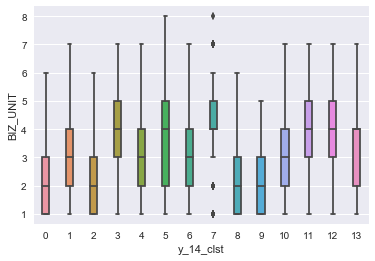

In [36]:
sns.set()
sns.boxplot(x= df_label['y_14_clst'], y= df_grouped['BIZ_UNIT'], width= 0.5)
plt.show()

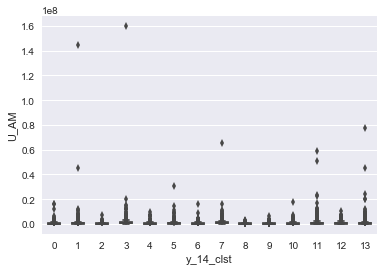

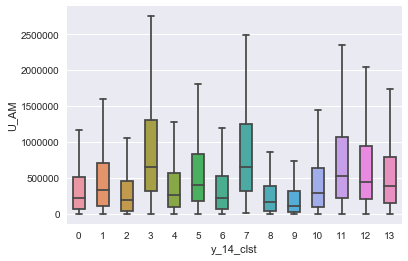

In [39]:
sns.set()
sns.boxplot(x= df_label['y_14_clst'], y= df_grouped['U_AM'], width= 0.5)
plt.show()
sns.boxplot(x= df_label['y_14_clst'], y= df_grouped['U_AM'], width= 0.5, showfliers= False)
plt.show()

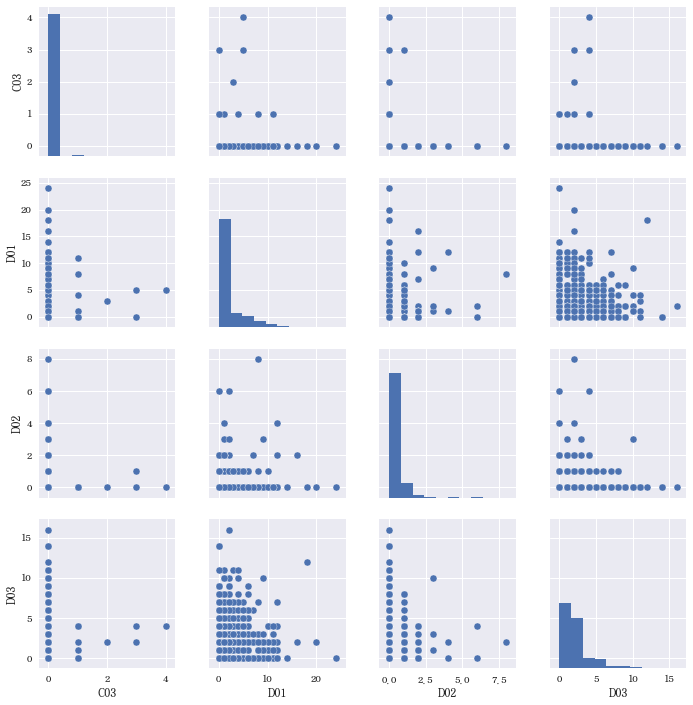

In [111]:
sns.pairplot(df_unit.iloc[:1000,5:], kind= 'scatter')
plt.show()

In [78]:
prefered_item_dict_05= {}
for i in range(df_label['y_14_clst'].nunique()):
    print('\nfor cluster {}:\n'.format(i))
    prefered_item_dict_05[i]= []
    for item in df_unit.columns.values.tolist():
        (stat_item, p_val_item)=  ttest_ind(df_unit[df_label['y_14_clst']==i][item], df_unit[item], equal_var= False)
        if p_val_item< 0.05 and stat_item>0:
            print('item {} has different mean with total dataset; ({}, {})'.format(item, stat_item, p_val_item))
            prefered_item_dict_05[i].append(item)


for cluster 0:


for cluster 1:

item C02 has different mean with total dataset; (3.253898671022142, 0.0011498306783538357)
item D01 has different mean with total dataset; (3.455936077600284, 0.0005552501210588539)

for cluster 2:


for cluster 3:

item B01 has different mean with total dataset; (5.399219951151647, 8.120373053147717e-08)
item B03 has different mean with total dataset; (12.036577604602767, 1.4898513176928177e-31)
item C01 has different mean with total dataset; (9.602522146615884, 4.378008132550444e-21)
item C02 has different mean with total dataset; (3.8286201894174017, 0.0001353498150823144)
item D02 has different mean with total dataset; (3.7313618558575805, 0.00019939798884476185)
item D03 has different mean with total dataset; (11.169375951220477, 1.2268473647951747e-27)

for cluster 4:


for cluster 5:

item B01 has different mean with total dataset; (2.8784340837180715, 0.004049159401741721)
item B03 has different mean with total dataset; (1.9848554377734104, 0.0

In [77]:
df_unit[df_label['y_14_clst']==0].head()

,B01,B02,B03,C01,C02,C03,D01,D02,D03
ID,,,,,,,,,
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26,16.0,0.0,8.0,1.0,3.0,0.0,0.0,0.0,4.0
32,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,2.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


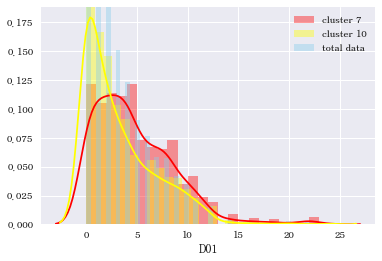

In [105]:
# logmin, logmax= np.log(df_unit['D01'].min()+1), np.log(df_unit['D01'].max())
# newbins= np.logspace(logmin, logmax, 50)

grp= sns.distplot(df_unit[df_label['y_14_clst']==7]['D01'], color= 'red', label= 'cluster 7', kde= True, norm_hist= True)
grp= sns.distplot(df_unit[df_label['y_14_clst']==10]['D01'], color= 'yellow', label= 'cluster 10', kde= True, norm_hist= True)
grp= sns.distplot(df_unit['D01'], color= 'skyblue', label= 'total data', kde= False, norm_hist= True)

# grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

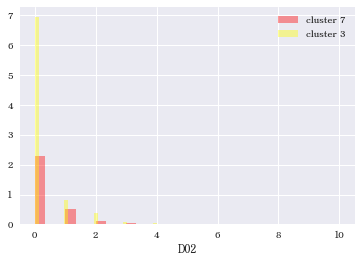

In [107]:
# logmin, logmax= np.log(df_unit['D01'].min()+1), np.log(df_unit['D01'].max())
# newbins= np.logspace(logmin, logmax, 50)

grp= sns.distplot(df_unit[df_label['y_14_clst']==7]['D02'], color= 'red', label= 'cluster 7', kde= False, norm_hist= True)
grp= sns.distplot(df_unit[df_label['y_14_clst']==3]['D02'], color= 'yellow', label= 'cluster 3', kde= False, norm_hist= True)
# grp= sns.distplot(df_unit['D02'], color= 'skyblue', label= 'total data', kde= False, norm_hist= True)

# grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

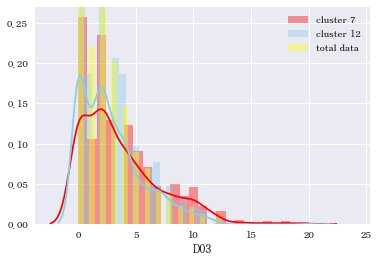

In [108]:
# logmin, logmax= np.log(df_unit['D01'].min()+1), np.log(df_unit['D01'].max())
# newbins= np.logspace(logmin, logmax, 50)

grp= sns.distplot(df_unit[df_label['y_14_clst']==7]['D03'], color= 'red', label= 'cluster 7', kde= True, norm_hist= True)
grp= sns.distplot(df_unit[df_label['y_14_clst']==12]['D03'], color= 'skyblue', label= 'cluster 12', kde= True, norm_hist= True)
grp= sns.distplot(df_unit['D03'], color= 'yellow', label= 'total data', kde= False, norm_hist= True)

# grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

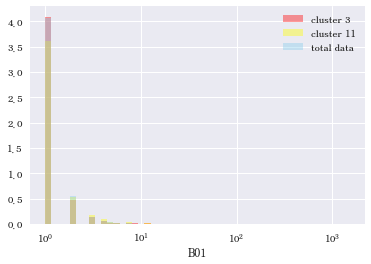

In [101]:
logmin, logmax= np.log(df_unit['D01'].min()+1), np.log(df_unit['D01'].max())
newbins= np.logspace(logmin, logmax, 50)

grp= sns.distplot(df_unit[df_label['y_14_clst']==3]['B01'], bins= newbins, color= 'red', label= 'cluster 3', kde= False, norm_hist= True)
grp= sns.distplot(df_unit[df_label['y_14_clst']==11]['B01'], bins= newbins, color= 'yellow', label= 'cluster 11', kde= False, norm_hist= True)
grp= sns.distplot(df_unit['B01'], bins= newbins, color= 'skyblue', label= 'total data', kde= False, norm_hist= True)

grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

In [ ]:
# B02, C03의 경우는 클러스터별로 차이가 거의 안 남.

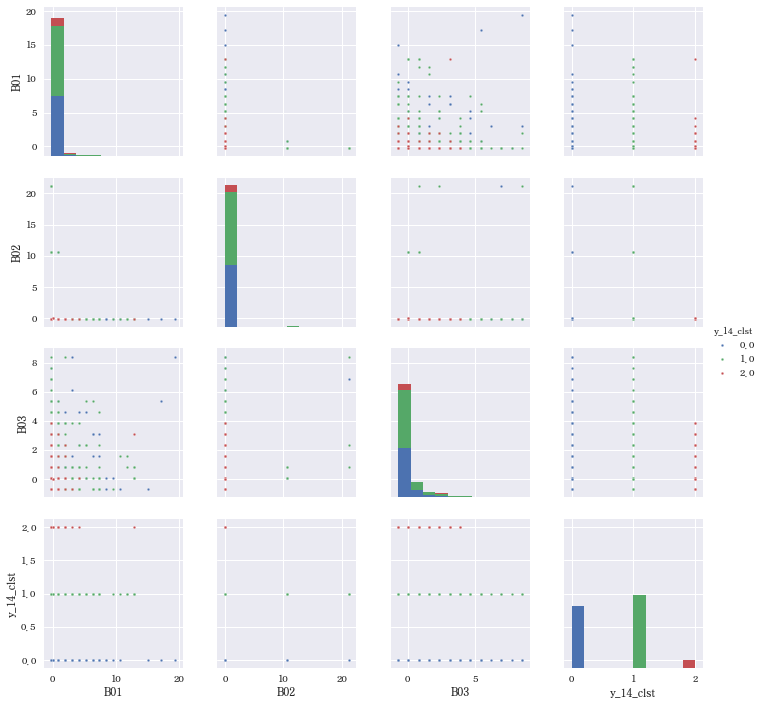

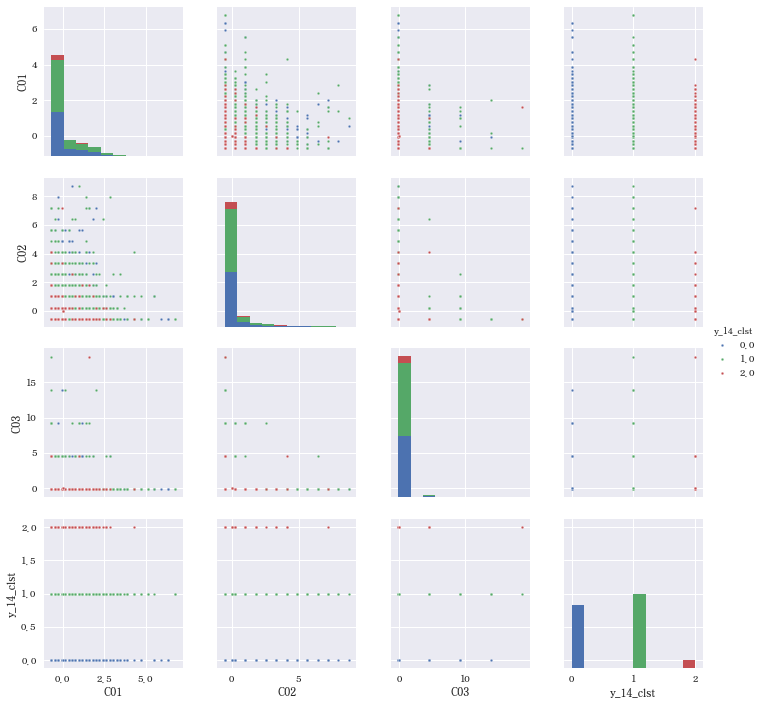

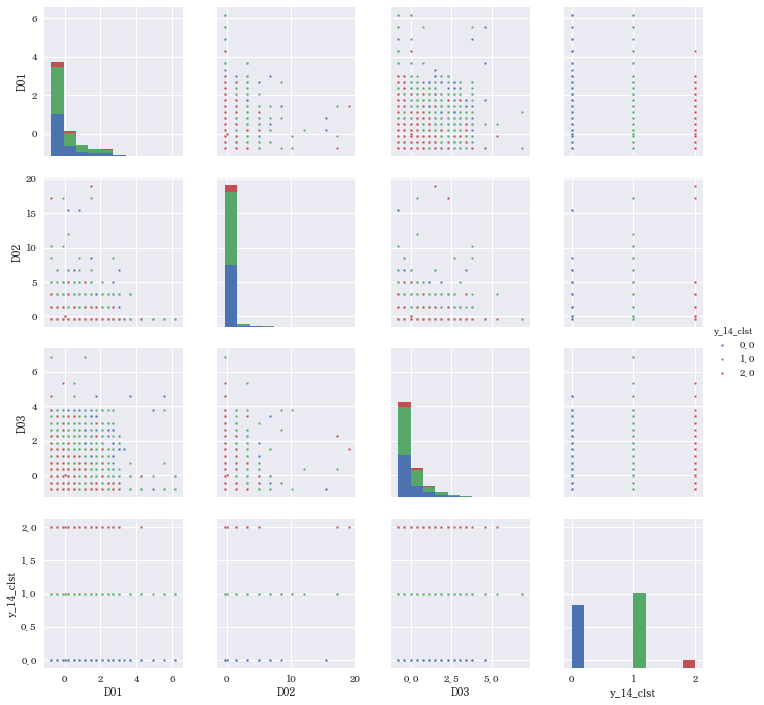

In [154]:
sns.pairplot(pairplt_df[pairplt_df['y_14_clst']<3][['B01', 'B02', 'B03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[pairplt_df['y_14_clst']<3][['C01', 'C02', 'C03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[pairplt_df['y_14_clst']<3][['D01', 'D02', 'D03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
plt.show()

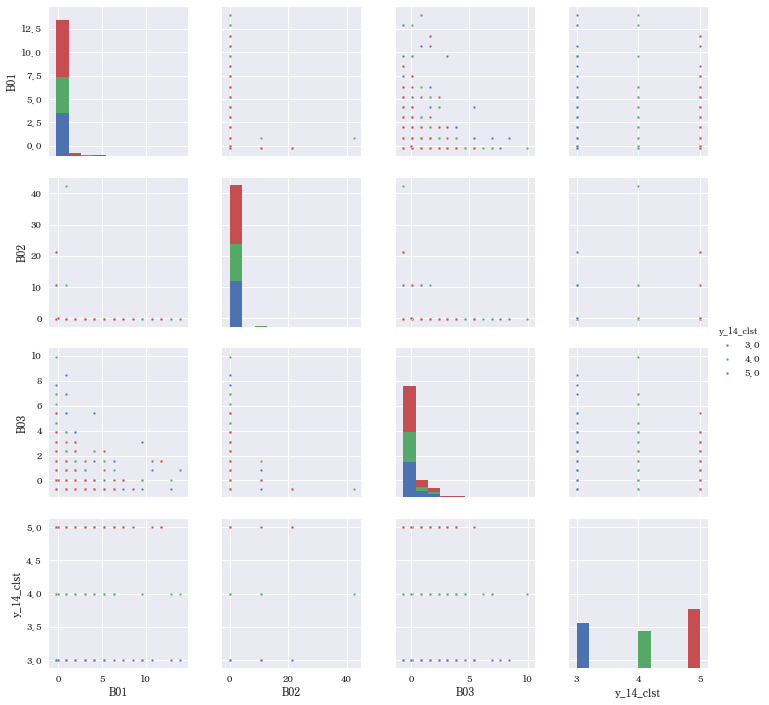

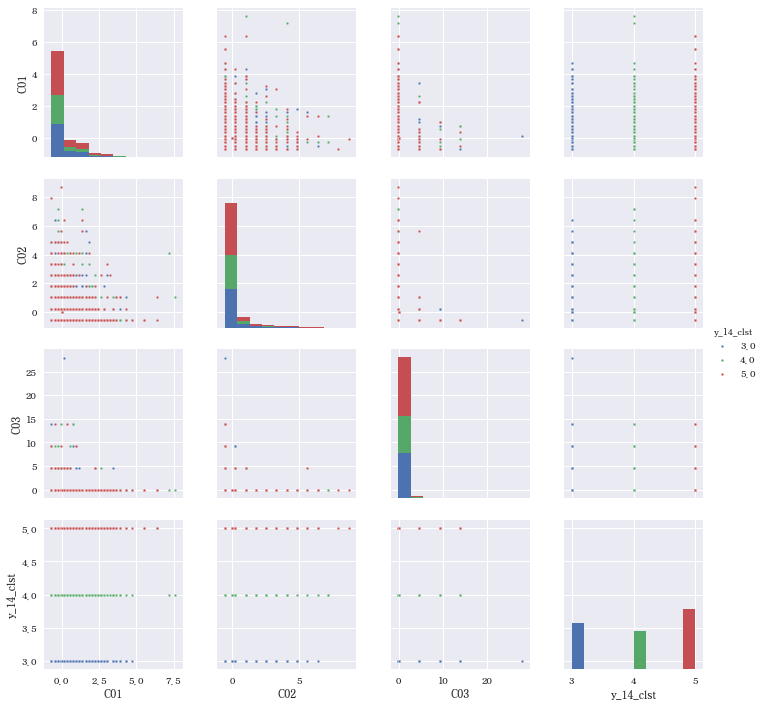

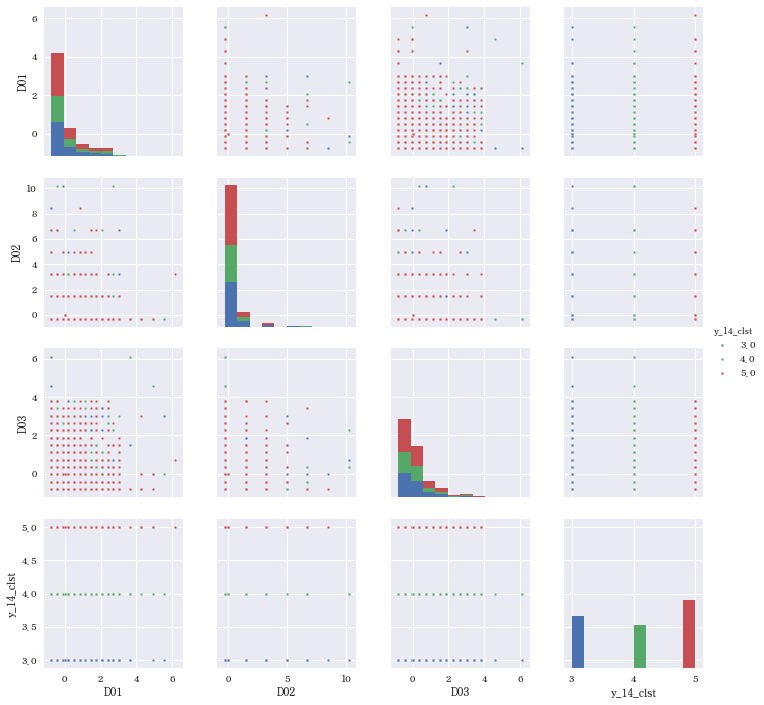

In [158]:
sns.pairplot(pairplt_df[(3<=pairplt_df['y_14_clst'])&(pairplt_df['y_14_clst']<6)][['B01', 'B02', 'B03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[(3<=pairplt_df['y_14_clst'])&(pairplt_df['y_14_clst']<6)][['C01', 'C02', 'C03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[(3<=pairplt_df['y_14_clst'])&(pairplt_df['y_14_clst']<6)][['D01', 'D02', 'D03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
plt.show()

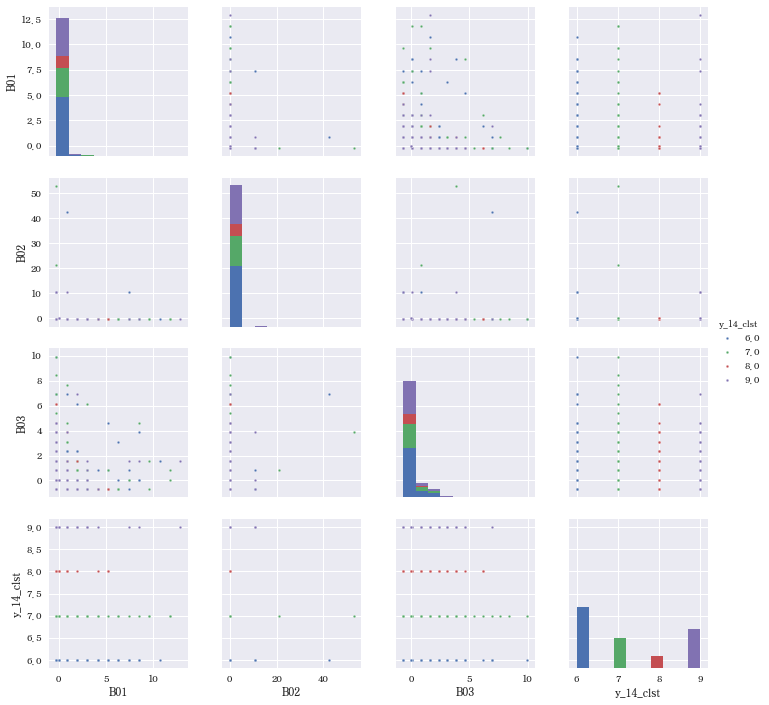

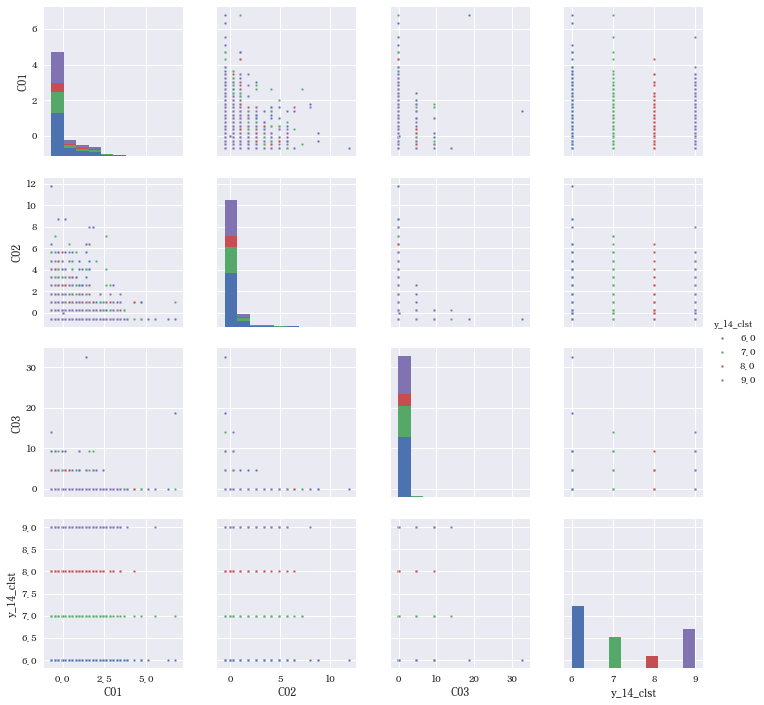

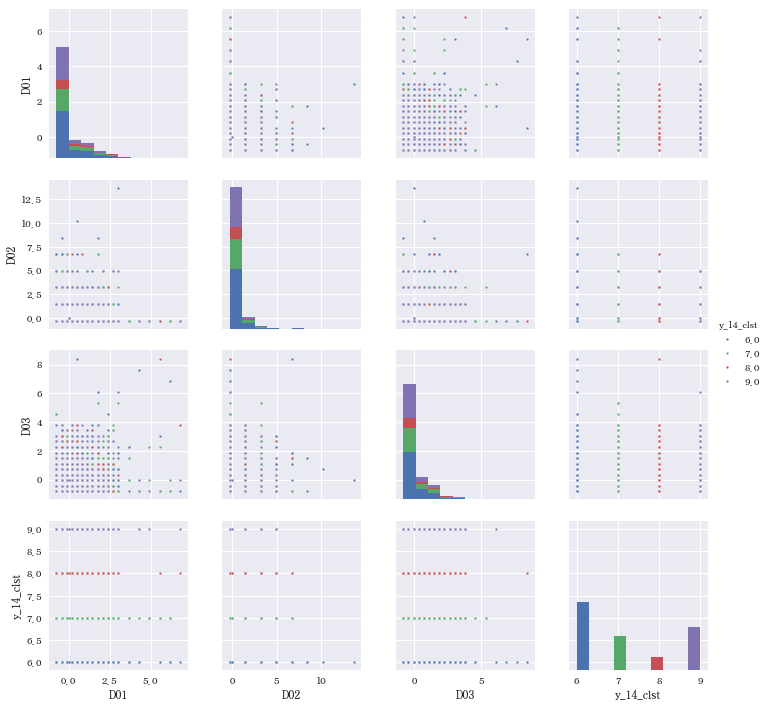

In [159]:
sns.pairplot(pairplt_df[(6<=pairplt_df['y_14_clst'])&(pairplt_df['y_14_clst']<10)][['B01', 'B02', 'B03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[(6<=pairplt_df['y_14_clst'])&(pairplt_df['y_14_clst']<10)][['C01', 'C02', 'C03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[(6<=pairplt_df['y_14_clst'])&(pairplt_df['y_14_clst']<10)][['D01', 'D02', 'D03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
plt.show()

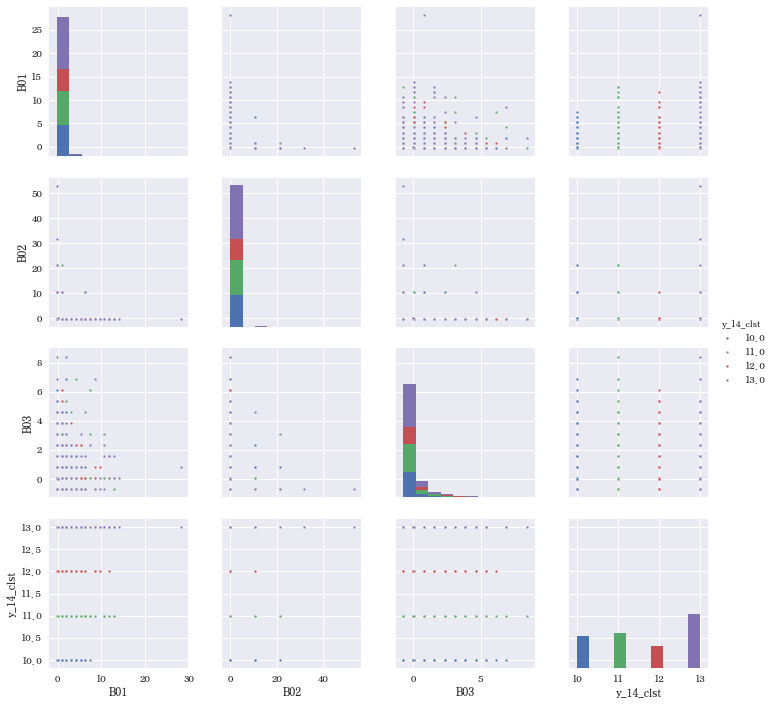

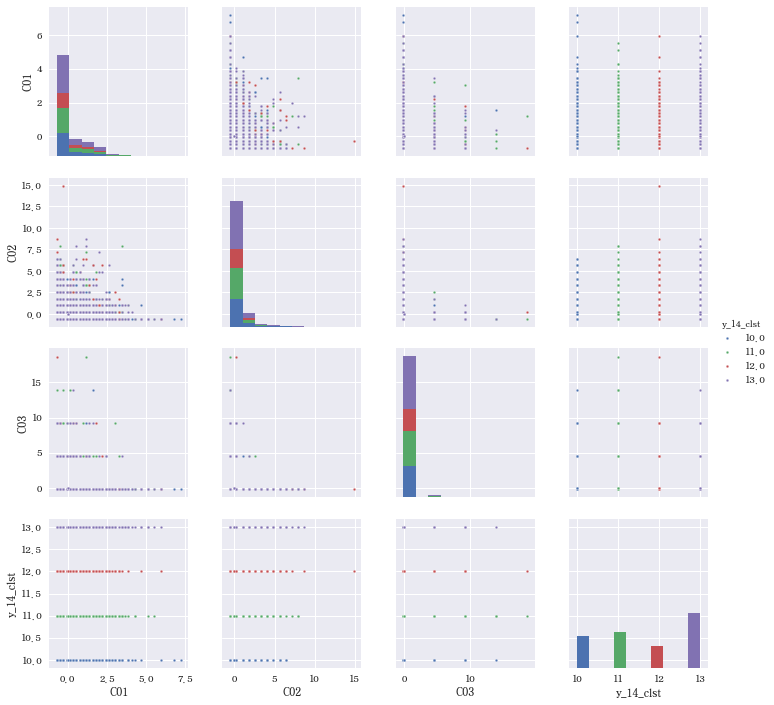

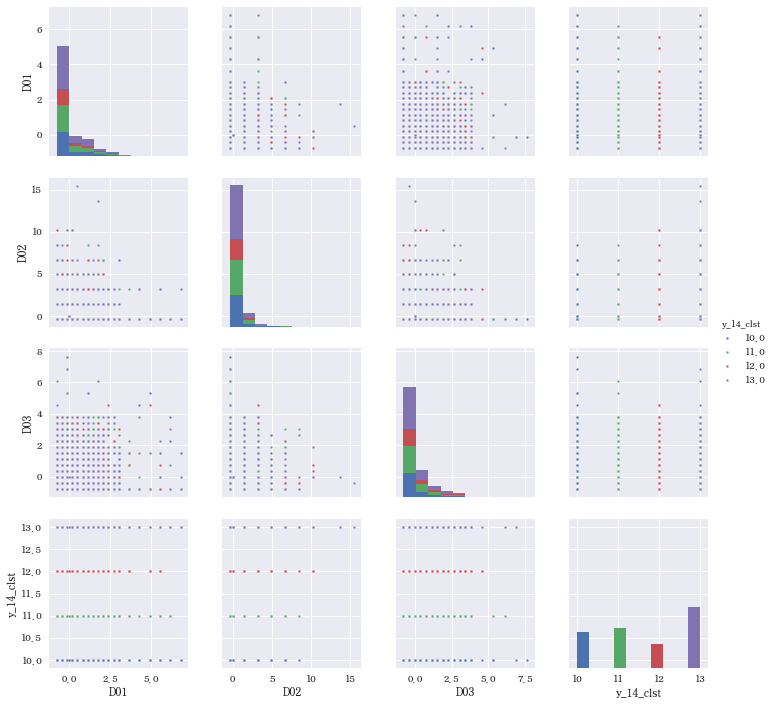

In [157]:
sns.pairplot(pairplt_df[10<=pairplt_df['y_14_clst']][['B01', 'B02', 'B03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[10<=pairplt_df['y_14_clst']][['C01', 'C02', 'C03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
sns.pairplot(pairplt_df[10<=pairplt_df['y_14_clst']][['D01', 'D02', 'D03', 'y_14_clst']], kind= 'scatter', hue= 'y_14_clst', plot_kws= dict(s=7))
plt.show()

In [151]:
pairplt_df= pd.concat([df_unit_norm, df_label['y_14_clst']], axis= 1)

In [152]:
pairplt_df.fillna(0, inplace= True)

In [149]:
df_unit_norm= scale(df_unit)

In [150]:
df_unit_norm= pd.DataFrame(df_unit_norm, columns= df_unit.columns)